# Malhas e curvaturas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
from matplotlib import tri
from scipy.spatial import Delaunay

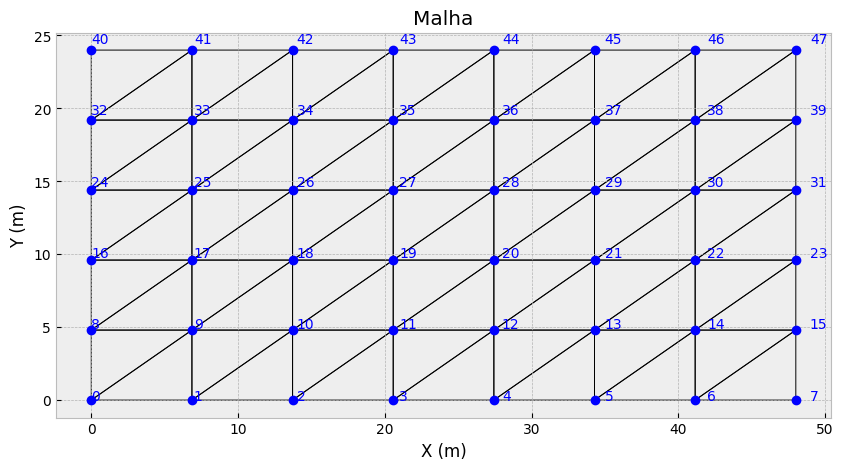

In [2]:
## =================================================================== ##
#  this is file malha2d.py, created at 27-Sep-2022                #
#  maintained by Gustavo Rabello dos Anjos                              #
#  e-mail: gustavo.rabello@gmail.com                                    #
## =================================================================== ##

# Definição dos parâmetros

#elem = 'quad'
elem = 'tri'
Lx = 48
Ly = 24
nx = 8
ny = 6

# Geração de:
## pontos

npoints = nx*ny

## elementos

if elem == 'tri':
 ne = 2*(nx-1)*(ny-1) # triangulo
 IEN = np.zeros( (ne,3),dtype='int' )   #Empty IEN

elif elem == 'quad':
 ne = (nx-1)*(ny-1) # quadrilatero
 IEN = np.zeros( (ne,4),dtype='int' )   #Empty IEN

Xv = np.linspace(0,Lx,nx)
Yv = np.linspace(0,Ly,ny)
X,Y = np.meshgrid(Xv,Yv)   #Gera matrizes (ny,nx)
X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

# Pertubação

#X[4] = X[4] + 0.14
#Y[4] = Y[4] - 0.03
#X[5] = X[5] - 0.04
#Y[5] = Y[5] + 0.06

# Construção da IEN

## IEN quadrilátera
if elem == 'quad':
  e = 0
  for i in range(0,ny-1):
    for j in range(0,nx-1):
      IEN[e] = [i*nx+j, i*nx+j+1, i*nx+j+nx+1, i*nx+j+nx]
      e += 1

## IEN triangular 
elif elem == 'tri':

  metodo = 'fabricado'   #delaunay ou fabricado

  if metodo == 'fabricado': 
    e = 0
    for i in range(0,ny-1):
      for j in range(0,nx-1):
        IEN[e] = [i*nx+j, i*nx+j+nx+1, i*nx+j+nx]
        e += 1

        IEN[e] = [i*nx+j, i*nx+j+1, i*nx+j+nx+1]
        e += 1

  elif metodo == 'delaunay':
    TRI = Delaunay(np.column_stack((X,Y)))   #np.column_stack torna vetores colunas de uma matriz
    IEN = TRI.simplices.copy()               #o método simplices retorna a IEN da malha gerado pelo Delaunay
    ne = IEN.shape[0]

# Cálculo da área do elemento

if elem == 'quad':

  Areas = np.empty(ne)

  e = 0
  for i in range(0,ny-1):
    for j in range(0,nx-1):

      lado1 = np.array([ X[i*nx+j+nx]-X[i*nx+j], Y[i*nx+j+nx]-Y[i*nx+j] ])
      lado2 = np.array([ X[i*nx+j+1]-X[i*nx+j], Y[i*nx+j+1]-Y[i*nx+j] ])
      diagonal = np.array([ X[i*nx+j+nx+1]-X[i*nx+j], Y[i*nx+j+nx+1]-Y[i*nx+j] ])

      A1 = np.linalg.norm(np.cross(lado1,diagonal))/2
      A2 = np.linalg.norm(np.cross(lado2,diagonal))/2
      A_elem = A1 + A2

      Areas[e] = A_elem
      e += 1

elif elem == 'tri':

  Areas = np.empty(ne)

  e = 0
  for i in range(0,ny-1):
    for j in range(0,nx-1):

      lado1 = np.array([ X[i*nx+j+nx]-X[i*nx+j], Y[i*nx+j+nx]-Y[i*nx+j] ])
      lado2 = np.array([ X[i*nx+j+1]-X[i*nx+j], Y[i*nx+j+1]-Y[i*nx+j] ])
      diagonal = np.array([ X[i*nx+j+nx+1]-X[i*nx+j], Y[i*nx+j+nx+1]-Y[i*nx+j] ])

      A_tri1 = np.linalg.norm(np.cross(lado1,diagonal))/2
      Areas[e] = A_tri1
      e += 1

      A_tri2 = np.linalg.norm(np.cross(lado2,diagonal))/2
      Areas[e] = A_tri2
      e += 1

#PLOTAGEM

plt.style.use('bmh')

fig, ax1 = plt.subplots( figsize=(10,5))

## Plot dos Índices dos pontos
for i in range(0,npoints):
 ax1.text(1.02*X[i],1.02*Y[i],str(i),color='blue')

## Plot dos Índices dos elementos
for e in range(0,ne):
  if elem == tri:
    v1,v2,v3 = IEN[e]
    xc = (X[v1] + X[v2] + X[v3])/3.0
    yc = (Y[v1] + Y[v2] + Y[v3])/3.0
    ax1.text(xc,yc,str(e))

  elif elem == tri:
    v1,v2,v3,v4 = IEN[e]
    xc = (X[v1] + X[v2] + X[v3] + X[v4])/4.0
    yc = (Y[v1] + Y[v2] + Y[v3] + Y[v4])/4.0
    ax1.text(xc,yc,str(e))

## Plot da malha
xy = np.c_[X,Y]
verts = xy[IEN]

pc = matplotlib.collections.PolyCollection(verts,edgecolors=('black',),
                                           facecolors='None',
                                           linewidths=(0.7,))
ax1.add_collection(pc)
ax1.plot(X,Y,'bo')
ax1.set_title('Malha')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
plt.show()

Malha abaixo da qualidade esperada, poucos elementos em ótimo estado (33.33%)


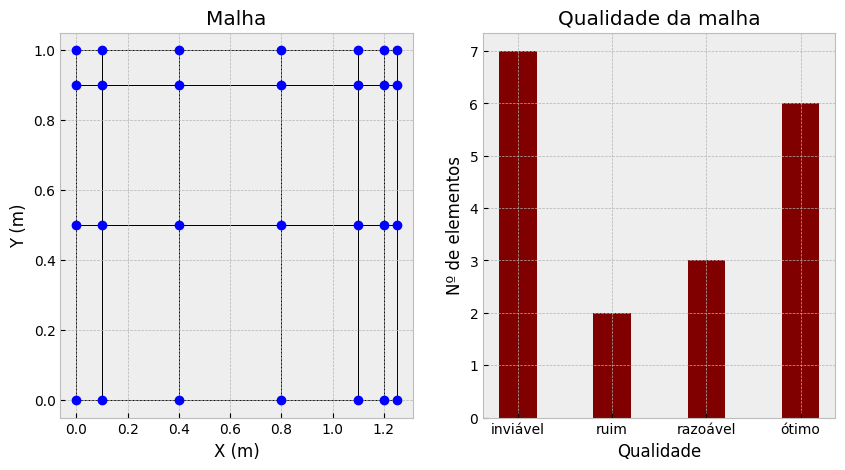

In [4]:
# Geração de pontos

Lx = 48
Ly = 24
nx = 16
ny = 8

#Xv = np.linspace(0,Lx,nx)
#Yv = np.linspace(0,Ly,ny)

Xv = np.array([0.0,0.1,0.4,0.8,1.1,1.2,1.25])
Yv = np.array([0.0,0.5,0.9,1.0])

nx = len(Xv)
ny = len(Yv)
ne = (nx-1)*(ny-1)

X,Y = np.meshgrid(Xv,Yv) # gerar matrizes (ny,nx)
X = np.reshape(X,nx*ny)
Y = np.reshape(Y,nx*ny)

# IEN

IEN = np.zeros((ne,4),dtype='int')

e = 0
for i in range(0,ny-1):
  for j in range(0,nx-1):
    IEN[e] = [j+i*nx,j+1+i*nx,j+nx+1+i*nx,j+nx+i*nx]
    e += 1

# Avaliando malha

Evaluators = np.empty(ne)

for e in range(0,ne):
  v1 = IEN[e,0]
  v2 = IEN[e,1]
  v4 = IEN[e,3]
  lado1 = np.linalg.norm(np.array([ X[v2]-X[v1], Y[v2] - Y[v1] ]))
  lado2 = np.linalg.norm(np.array([ X[v4]-X[v1], Y[v4] - Y[v1] ]))
  lados = [lado1,lado2]

  criteria = min(lados)/max(lados)
  Evaluators[e] = criteria   

nivel1 = 0
nivel2 = 0
nivel3 = 0
nivel4 = 0

for value in Evaluators:
  
  if 0 < value <= 0.25:
    nivel1 += 1

  elif 0.25 < value <= 0.50:
    nivel2 += 1

  elif 0.50 < value <= 0.75:
    nivel3 += 1

  elif 0.75 < value <= 1.0:
    nivel4 += 1

classificacao = {'inviável':nivel1 , 'ruim':nivel2, 'razoável':nivel3, 'ótimo':nivel4}

qualidade = list(classificacao.keys())
ElemPorQualidade = list(classificacao.values())

if nivel4/ne >= 0.8:
  print('Mais de 80% dos elementos em ótimo estado ({}%), malha está adequada.'.format(np.around(nivel4/ne*100,2)))

else:
  print('Malha abaixo da qualidade esperada, poucos elementos em ótimo estado ({}%)'.format(np.around(nivel4/ne*100,2)))

# PLOTAGEM

plt.style.use('bmh')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

xy = np.c_[X,Y]
verts = xy[IEN]

#ax1 = plt.gca()
pc = matplotlib.collections.PolyCollection(verts,edgecolors=('black',),
                                           facecolors='None',
                                           linewidths=(0.7,))
ax1.add_collection(pc)
ax1.plot(X,Y,'bo')
ax1.set_title('Malha')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')

ax2.bar(qualidade, ElemPorQualidade, color ='maroon', width = 0.4)
ax2.set_title('Qualidade da malha')
ax2.set_xlabel('Qualidade')
ax2.set_ylabel('Nº de elementos')

#plt.plot(X,Y,'bo')
#plt.gca().set_aspect('equal')
plt.show()

## Confeccionando malhas em $R^2$

In [ ]:
nx = np.linspace(0,10,11)
ny = np.linspace(0,10,11)
h = abs(nx[1] - nx[0])

malha = np.empty((len(nx),len(ny),2))

for i in range(len(nx)):
  for j in range(len(ny)):
    par = np.array([nx[i],ny[j]])
    malha[i,j] = par

print('Dimensões do tensor da malha: ')
print(malha.shape)

plt.style.use('default')
fig, gr = plt.subplots(figsize = (6,4))

for i in range(len(ny)):
  #linhas verticais
  x = malha[i,:,0]
  y = malha[i,:,1]
  
  gr.plot(x, y, 'red')

  #linhas horizontais
  x = malha[:,i,0]
  y = malha[:,i,1]
  
  gr.plot(x, y, 'red')

  #linhas diagonais inferiores
  x = nx[i:]

  gr.plot(x, x - h*i, 'red')

  #linhas diagonais superiores
  x = nx[:-i]
  gr.plot(x, x + h*i, 'red')


'''
malha = np.empty((len(nx)*len(ny),2))
contador = 0

for i in range(len(nx)):
  for j in range(len(ny)):
    par = np.array([nx[i],ny[j]])    
    malha[contador] = par
    contador = contador + 1

print(malha.shape)

fig, ax = plt.subplots()

ax.scatter(malha[:,0],malha[:,1],'red')
for i in range(0,nx*ny/nx):
  ax.plot(malha[i,0], malha[i,1], 'red')

for i in range(nx*ny/nx,nx*ny/nx):
  ax.plot(malha[i,0], malha[i,1], 'red')
'''


Pertubando a malha

In [ ]:
nx = np.linspace(0,0.5,20)
ny = np.linspace(0,0.5,30)


#Pertubações
def f(x):
  return -0.3*np.sin(2*np.pi*2*x/10 - 2*np.pi/4)

def g(x):
  return np.exp(x)

malha = np.empty((len(nx),len(ny),2))

for i in range(len(nx)):
  for j in range(len(ny)):
    par = np.array([nx[i],ny[j]])
    malha[i,j] = par

print('Dimensões do tensor da malha: ')
print(malha.shape)

#Pertubação somente na última linha:
#malha[:,-1,1] = malha[:,-1,1] + f(malha[:,-1,0])

#Pertubação em todas as linhas:
for i in range(len(ny)):
  malha[:,i,1] = malha[:,i,1] + f(malha[:,i,0])

#Pertubação em todas as colunas:
for i in range(len(nx)):
  malha[i,:,0] = malha[i,:,0] + f(malha[i,:,1])


#Plotando
plt.style.use('default')
fig, gr = plt.subplots(figsize = (6,4))

for i in range(len(nx)):
  #linhas verticais e nós
  x = malha[i,:,0]
  y = malha[i,:,1]
  
  gr.plot(x, y, 'red')

for j in range(len(ny)):
  #linhas horizontais
  x = malha[:,j,0]
  y = malha[:,j,1]
  
  gr.plot(x, y, 'red')
  


## Curvatura em $R^2$

Curvatura é a quantidade na qual um objeto geométrico se desvia do plano, portanto a curvatura de um plano
é zero. O cálculo da curvatura é importante em muitas aplicações de engenharia. Como exemplo importante,
cita-se o cálculo da força de tensão superficial em escoamentos bifásicos que apresentam interface maleável.
Curvatura em um ponto n é dado, discretamente, por:

$k_n = \frac{t_{n+1}-t_{n-1}}{\Delta s}$

$t_{n-1}$ e $t_{n+1}$ são vetores que ligão o ponto $n-1$ ao $n$ e $n$ ao $n+1$ e $\Delta s$ é a distância entre $n+1$ e $n-1$.

In [ ]:
nt = np.linspace(0,2*np.pi,1000)
r = 1

#Curvatura real
k_real = 1/r

#Construindo curva
curva = np.empty((nt.size,2))

for i in range(nt.size):
  curva[i] = [r*np.cos(nt[i]), r*np.sin(nt[i])]

#Plotando
plt.style.use('default')
fig, gr = plt.subplots(figsize = (6,6))

x = curva[:,0]
y = curva[:,1]

plt.plot(x, y, 'red')

#Curvatura
K = np.empty(nt.size)

#As primeira e última curvaturas devem ser postas manualmente
#No caso de curvas fechadas, ocorre da maneira abaixo:

t2 = (curva[1] - curva[0])/np.linalg.norm(curva[1] - curva[0])
t1 = (curva[0] - curva[-1])/np.linalg.norm(curva[0] - curva[-1])
#T = (t2 - t1)/np.linalg.norm(curva[1] - curva[-1])
T = (t2 - t1)/np.linalg.norm(t2 - t1)
k = np.linalg.norm(T)
K[0] = k

t2 = (curva[0] - curva[-1])/np.linalg.norm(curva[0] - curva[-1])
t1 = (curva[-1] - curva[-2])/np.linalg.norm(curva[-1] - curva[-2])
#T = (t2 - t1)/np.linalg.norm(curva[0] - curva[-2])
T = (t2 - t1)/np.linalg.norm(t2 - t1)
k = np.linalg.norm(T)
K[-1] = k

for i in range(1,nt.size-1):
  t2 = (curva[i+1] - curva[i])/np.linalg.norm(curva[i+1] - curva[i])
  t1 = (curva[i] - curva[i-1])/np.linalg.norm(curva[i] - curva[i-1])

  #T = (t2 - t1)/np.linalg.norm(curva[i+1] - curva[i-1])  ERRADO, assim a curvatura fica dividida por dois
  T = (t2 - t1)/np.linalg.norm(t2 - t1)

  k = np.linalg.norm(T)

  K[i] = k

print('Curvatura aproximada: ')
print(K[2])
print('Curvatura exata: ')
print(k_real)


## Confeccionando malhas em $R^3$

**Superfície:**

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

nx = np.linspace(-0.10,0.10,30)
ny = np.linspace(-0.10,0.10,30)

#Pertubações
def f(x):
  return -0.3*np.sin(2*np.pi*2*x/10 - 2*np.pi/4)

def g(x):
  return np.exp(x)

X, Y = np.meshgrid(nx, ny)

#Paraboloide
#Z = (X/2)**2 + (Y/3)**2
#Paraboloide hiperbólico
Z = (X/2)**2 - (Y/3)**2
#Esfera
#Z = np.sqrt(1 - X**2 - Y**2)

# Plot the surface.

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


**Volume:**

In [ ]:
from numpy.lib.nanfunctions import nanmax
nx = np.linspace(0,0.1,10)
ny = np.linspace(0,0.4,15)
nz = np.linspace(0,0.10,15)

#Pertubações
def f(x):
  return -0.3*np.sin(2*np.pi*2*x/10 - 2*np.pi/4)

def g(x):
  return np.exp(x)

malha = np.empty((len(nx),len(ny),len(nz),3))

for i in range(len(nx)):
  for j in range(len(ny)):
    for k in range(len(nz)):
      par = np.array([nx[i],ny[j],nz[k]])
      malha[i,j,k] = par

print('Dimensões do tensor da malha: ')
print(malha.shape)

#Pertubação em todas as linhas:

for j in range(len(ny)):
  malha[:,j,:,1] = malha[:,j,:,1] + f(malha[:,j,:,0])

#Pertubação em todas as colunas:
for i in range(len(nx)):
  malha[i,:,:,0] = malha[i,:,:,0] + f(malha[i,:,:,1])


#Plotando
plt.style.use('default')

fig, ax1 = plt.subplots()
ax1 = plt.axes(projection="3d")


for i in range(len(nx)):
  for j in range(len(ny)):
    
    x = malha[i,j,:,0]
    y = malha[i,j,:,1]
    z = malha[i,j,:,2]

    ax1.plot(x, y, z, 'red')

for i in range(len(nx)):
  for k in range(len(nz)):

    x = malha[i,:,k,0]
    y = malha[i,:,k,1]
    z = malha[i,:,k,2]

    ax1.plot(x, y, z, 'red')

for j in range(len(ny)):
  for k in range(len(nz)):

    x = malha[:,j,k,0]
    y = malha[:,j,k,1]
    z = malha[:,j,k,2]

    ax1.plot3D(x, y, z, 'red')

### Curvatura em $R^3$